In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data wrangling and EDA

### a. Import datasets

In [22]:
grc_df = pd.read_csv("data/year_msoa_grocery.csv", index_col="area_id")
grc_df["density"] = grc_df.population / grc_df.area_sq_km
grc_df.head()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,density
area_id,,,,,,,,,,,,,,,,,,,,,
E02000001,323.180804,35.0,150.0,250.0,400.0,1000.0,323.685705,1.001360,98.849228,13.0,...,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069,2305.862069
E02000002,397.651232,32.5,150.0,300.0,500.0,1020.0,550.434424,6.030232,118.288417,11.0,...,7379.0,3549.0,3830.0,2150.0,4151.0,1078.0,35.567286,2.16,3416.203704,3416.203704
E02000003,371.276702,30.0,140.0,250.0,450.0,1200.0,564.404826,4.398728,118.385615,12.0,...,10720.0,5297.0,5423.0,2762.0,6649.0,1309.0,35.700466,2.14,5009.345794,5009.345794
E02000004,347.481292,29.0,126.0,250.0,430.0,1000.0,479.372575,5.297349,104.435407,11.0,...,6536.0,3119.0,3417.0,1454.0,4044.0,1038.0,38.493115,2.48,2635.483871,2635.483871
E02000005,400.576688,32.5,150.0,296.0,500.0,1050.0,593.021809,5.107669,128.997438,11.0,...,9243.0,4478.0,4765.0,2678.0,5554.0,1011.0,34.156335,1.19,7767.226891,7767.226891


In [23]:
inc_df = pd.read_excel("data/ons-model-based-income-estimates-msoa.xls",
                       sheet_name="2015-16 (annual income)",
                       index_col="MSOA code")
inc_df.head()

,MSOA name,Local authority code,Local authority name,Region code,Region name,Total annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£),Net annual income (£),...,Lower confidence limit (£).1,Confidence interval (£).1,Net income before housing costs (£),Upper confidence limit (£).2,Lower confidence limit (£).2,Confidence interval (£).2,Net income after housing costs (£),Upper confidence limit (£).3,Lower confidence limit (£).3,Confidence interval (£).3
MSOA code,,,,,,,,,,,,,,,,,,,,,
E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,35900,45200,28500,16700,27300,...,22100,11700,27600,33300,22800,10400,25600,31000,21200,9800
E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,42500,53600,33700,19900,29800,...,23900,13100,28600,34500,23700,10800,27500,33200,22700,10500
E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,38000,47700,30200,17600,28300,...,22800,12300,28200,34100,23400,10700,26700,32300,22100,10200
E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,33500,42200,26700,15500,26600,...,21600,11200,25500,30800,21100,9700,22400,27100,18500,8700
E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,31700,39800,25200,14600,25500,...,20700,10800,25100,30200,20800,9500,20900,25300,17200,8000


### b. Exploration of the income dataset

In [24]:
inc_df.columns

Index(['MSOA name', 'Local authority code', 'Local authority name',
       'Region code', 'Region name', 'Total annual income (£)',
       'Upper confidence limit (£)', 'Lower confidence limit (£)',
       'Confidence interval (£)', 'Net annual income (£)',
       'Upper confidence limit (£).1', 'Lower confidence limit (£).1',
       'Confidence interval (£).1', 'Net income before housing costs (£)',
       'Upper confidence limit (£).2', 'Lower confidence limit (£).2',
       'Confidence interval (£).2', 'Net income after housing costs (£)',
       'Upper confidence limit (£).3', 'Lower confidence limit (£).3',
       'Confidence interval (£).3'],
      dtype='object')

The values that we have access to, with there confidence intervals, are:
- Total annual income
- Net annual income
- Net income before housing costs
- Net income after housing costs

In [25]:
# Rename columns to suppress the '£' character
col_names = ['MSOA name', 'Local authority code', 'Local authority name',
       'Region code', 'Region name', 'Total annual income',
       'Upper confidence limit', 'Lower confidence limit',
       'Confidence interval', 'Net annual income',
       'Upper confidence limit.1', 'Lower confidence limit.1',
       'Confidence interval.1', 'Net income before housing costs',
       'Upper confidence limit.2', 'Lower confidence limit.2',
       'Confidence interval.2', 'Net income after housing costs',
       'Upper confidence limit.3', 'Lower confidence limit.3',
       'Confidence interval.3']
inc_df.columns = col_names

In [26]:
# Number of different local authorities
inc_df["Local authority name"].unique().shape[0]

348

In [27]:
# Number of different regions
inc_df["Region name"].unique().shape[0]

10

### c. Join datasets

In [28]:
areas = set(grc_df.index).intersection(set(inc_df.index))
print(f"There are {len(grc_df)} areas in the Tesco dataset.")
print(f"{len(areas)} of them appear in the income dataset.")

There are 983 areas in the Tesco dataset.
983 of them appear in the income dataset.


(The numbers above are good news)

In [29]:
df = grc_df.join(inc_df, how="inner")
df.shape

(983, 223)

### d. EDA

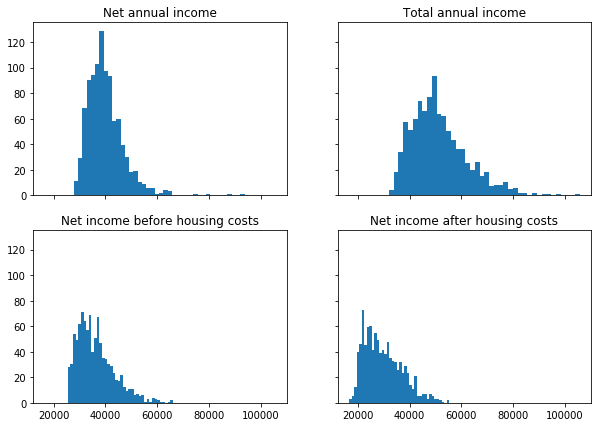

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(10,7), sharex=True, sharey=True)
income_types = ["Net annual income", "Total annual income",
                "Net income before housing costs",
                "Net income after housing costs"]
for i in range(4):
    ax = axes[i//2, i%2]
    title = income_types[i]
    ax.set_title(title)
    data = df[title]
    ax.hist(data, bins=40)
plt.show()

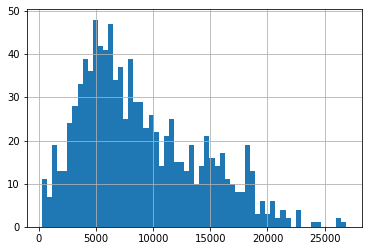

In [31]:
df["density"].hist(bins=60)
plt.show()

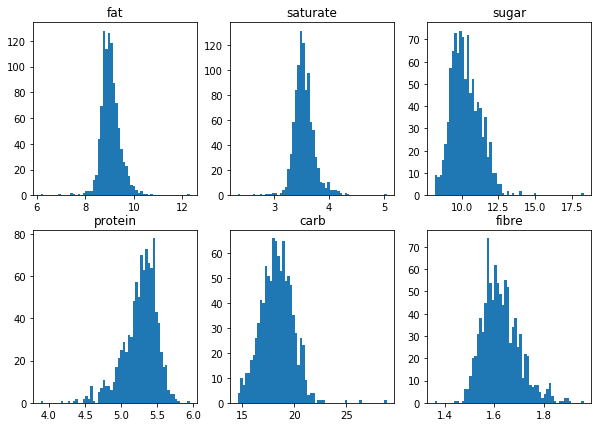

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(10,7))
nutrients = ["fat", "saturate", "sugar", "protein", "carb", "fibre"]
for i in range(6):
    ax = axes[i//3, i%3]
    title = nutrients[i]
    ax.set_title(title)
    data = df[title]
    ax.hist(data, bins=60)
plt.show()

### Type of products preferred by age groups
In this section, the Spearman rank correlation between the products purchased (out of 17 types of products) in each area and the age groups in those areas.
We only consider areas with representativeness socre bigger than 30%, the smallest round number from the mean)
We also only consider correlations having a p-value smaller 0.05 for statistical signifiance.

For now, we tke into account the correlations accounting for ALL areas present in the dataset. (Further we'll look on more specific types of areas)

In [177]:
df["representativeness_norm"].describe()

count    983.000000
mean       0.313241
std        0.179997
min        0.000000
25%        0.168584
50%        0.295219
75%        0.430582
max        1.000000
Name: representativeness_norm, dtype: float64

In [328]:
df["young_density"] = df["age_0_17"]/df["population"]
df["middle_age_density"] = df["age_18_64"]/df["population"]
df["old_density"] = df["age_65+"]/df["population"]
smaller_df = df[df["representativeness_norm"]>0.30][["f_beer","f_dairy","f_eggs","f_fats_oils"
                                                     ,"f_fish","f_fruit_veg","f_grains","f_meat_red"
                                                     ,"f_poultry","f_readymade","f_sauces","f_soft_drinks"
                                                     ,"f_spirits","f_sweets","f_tea_coffee","f_water","f_wine"
                                                     ,"Net annual income", "young_density"
                                                     , "middle_age_density", "old_density"]]
smaller_df

,f_beer,f_dairy,f_eggs,f_fats_oils,f_fish,f_fruit_veg,f_grains,f_meat_red,f_poultry,f_readymade,...,f_soft_drinks,f_spirits,f_sweets,f_tea_coffee,f_water,f_wine,Net annual income,young_density,middle_age_density,old_density
E02000001,0.026301,0.121112,0.011752,0.022868,0.021308,0.322855,0.122291,0.046465,0.018063,0.057101,...,0.021961,0.003292,0.139701,0.004960,0.022599,0.025993,43300,0.152236,0.650366,0.197398
E02000012,0.007193,0.092983,0.011414,0.034083,0.024773,0.250479,0.149202,0.046757,0.019861,0.052655,...,0.034725,0.002616,0.198840,0.010475,0.038164,0.009064,40000,0.267637,0.623503,0.108860
E02000017,0.012659,0.100989,0.012886,0.034156,0.020140,0.252008,0.146207,0.050662,0.019913,0.057973,...,0.037694,0.004314,0.176337,0.005671,0.040826,0.012157,37200,0.256880,0.659890,0.083230
E02000024,0.017858,0.100376,0.010945,0.032422,0.025921,0.290365,0.137714,0.056953,0.020304,0.057440,...,0.020593,0.002618,0.149189,0.006362,0.024376,0.027629,46500,0.213651,0.599725,0.186624
E02000025,0.018608,0.106568,0.010485,0.029142,0.022772,0.266955,0.141482,0.054936,0.020518,0.061321,...,0.023552,0.003391,0.171096,0.005765,0.023341,0.023239,37000,0.205226,0.638717,0.156057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E02006924,0.013242,0.108643,0.012644,0.039641,0.020217,0.268755,0.150594,0.033835,0.015115,0.050282,...,0.030015,0.002647,0.187202,0.005913,0.041075,0.005780,39600,0.230643,0.634567,0.134790
E02006925,0.007257,0.111869,0.012069,0.033861,0.018874,0.254220,0.164596,0.035725,0.016341,0.057315,...,0.030432,0.002792,0.194986,0.004722,0.034613,0.006105,44600,0.251207,0.602499,0.146295
E02006928,0.018740,0.103197,0.013560,0.027801,0.023117,0.300439,0.137821,0.053312,0.023936,0.051991,...,0.028109,0.002955,0.142371,0.005824,0.033721,0.016427,49100,0.198894,0.763875,0.037231
E02006929,0.015957,0.105020,0.012133,0.029194,0.021565,0.281111,0.151645,0.048121,0.019608,0.065102,...,0.032803,0.003040,0.147214,0.005320,0.029836,0.016807,42700,0.195888,0.721763,0.082349


In [329]:
#compute Spearman rank correlation and take only the relevant ones (p < 0.05)
rho, p_val = stats.spearmanr(smaller_df, axis = 0)
rho = pd.DataFrame(rho, index = smaller_df.columns, columns = smaller_df.columns)
print(rho.shape)
rho.where(p_val < 0.05, inplace = True)

(21, 21)


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


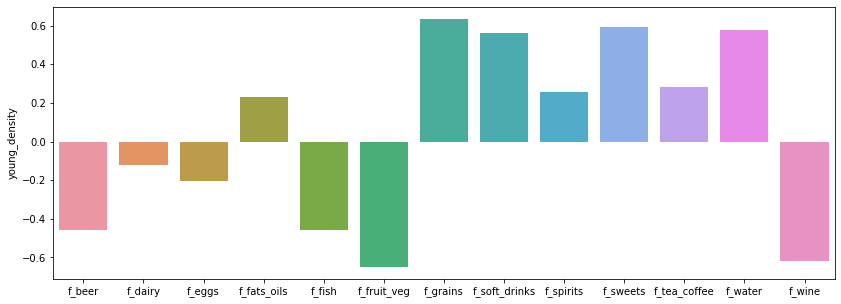

In [358]:
plt.figure(figsize = (14,5))
y_ax = rho[abs(rho['young_density']) > 0.107]['young_density'].drop(["young_density", "Net annual income", "middle_age_density"])
x_ax = rho[abs(rho['young_density']) > 0.107].drop(["young_density", "Net annual income", "middle_age_density"]).index
sns.barplot(x_ax, y_ax)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


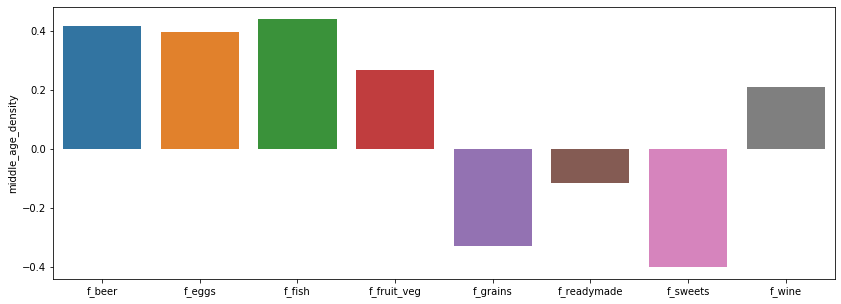

In [359]:
plt.figure(figsize = (14,5))
y_ax = rho[abs(rho['middle_age_density']) > 0.107]['middle_age_density'].drop(["young_density","middle_age_density", "old_density"])
x_ax = rho[abs(rho['middle_age_density'])>0.107].drop(["young_density","middle_age_density", "old_density"]).index
sns.barplot(x_ax, y_ax )

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


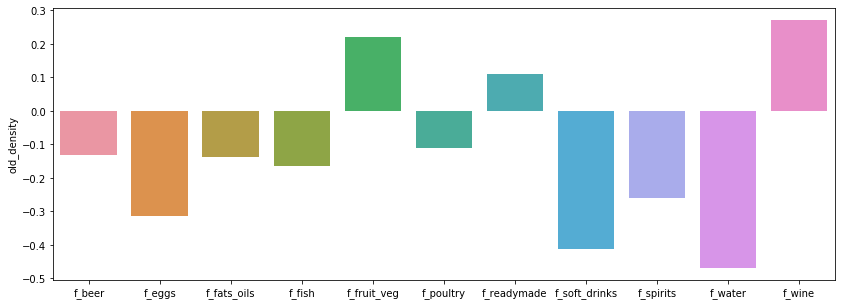

In [360]:
plt.figure(figsize = (14,5))
y_ax = rho[abs(rho['old_density']) >= 0.107]['old_density'].drop(["Net annual income", "middle_age_density", "old_density"])
x_ax = rho[abs(rho['old_density'])>=0.107].drop(["Net annual income", "middle_age_density", "old_density"]).index
sns.barplot(x_ax, y_ax)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


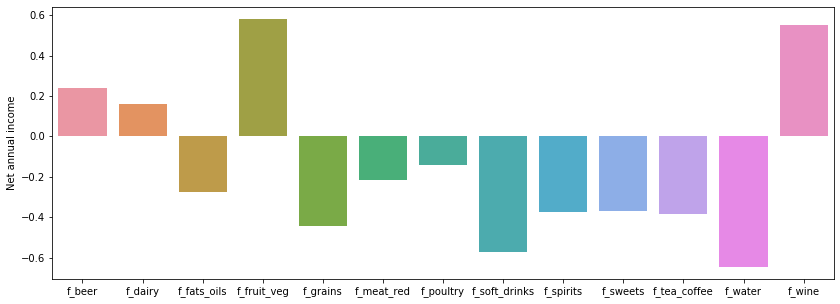

In [361]:
plt.figure(figsize = (14, 5))
y_ax = rho[abs(rho['Net annual income']) >= 0.107]['Net annual income'].drop(["Net annual income", "young_density", "old_density"])
x_ax = rho[abs(rho['Net annual income'])>=0.107].drop(["Net annual income", "young_density", "old_density"]).index
sns.barplot(x_ax, y_ax )

Now let's look at the same correlations, but within specific groups of areas. These groups will be split between : Net income (low, medium, high) and density (low, medium, high) 

In [342]:
df["Net annual income"].describe()

count      983.000000
mean     39955.442523
std       6949.133514
min      27800.000000
25%      35000.000000
50%      38800.000000
75%      43150.000000
max      93800.000000
Name: Net annual income, dtype: float64

In [343]:
#from the above numbers, we see a net difference between net annual income. 
#Define low incomes as the range between the min and the  25th_percentile, that is : [27'800, 35'000]
#Medium income as the income between the 25th and 75th percentile : [35'000, 43'150]
#High : above Medium

In [344]:
low_inc_df = smaller_df[(smaller_df["Net annual income"] >= 27800) & (smaller_df["Net annual income"] <= 35000)]
med_inc_df = smaller_df[(smaller_df["Net annual income"] >35000) & (smaller_df["Net annual income"] <= 43150)]
high_inc_df = smaller_df[(smaller_df["Net annual income"] >43150)]

In [345]:
#PLOTS FOR THE YOUNGS
rho_low_inc, p_val_low_inc = stats.spearmanr(low_inc_df, axis = 0)
rho_low_inc = pd.DataFrame(rho_low_inc, index = low_inc_df.columns, columns = low_inc_df.columns)
rho_low_inc.where(p_val_low_inc < 0.05,inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'low income areas')

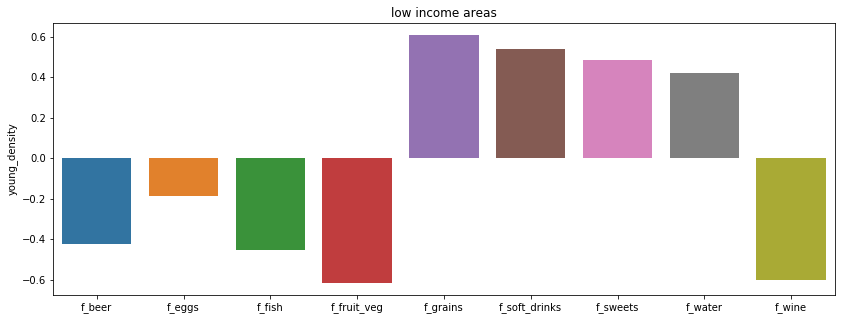

In [364]:
plt.figure(figsize = (14,5))
y_ax = rho_low_inc[abs(rho_low_inc['young_density']) > 0.107]['young_density'].drop(["Net annual income", 
                                                                                     "young_density",
                                                                                     "middle_age_density"])

x_ax = rho_low_inc[abs(rho_low_inc['young_density']) > 0.107].drop(["Net annual income", 
                                                                    "young_density",
                                                                    "middle_age_density"]).index
sns.barplot(x_ax, y_ax )
plt.title("low income areas")

In [347]:
rho_med_inc, p_val_med_inc = stats.spearmanr(med_inc_df, axis = 0)
rho_med_inc = pd.DataFrame(rho_med_inc, index = med_inc_df.columns, columns = med_inc_df.columns)
print(rho_med_inc.shape)
rho_med_inc.where(p_val_med_inc < 0.05,inplace = True)

(21, 21)


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'med income areas')

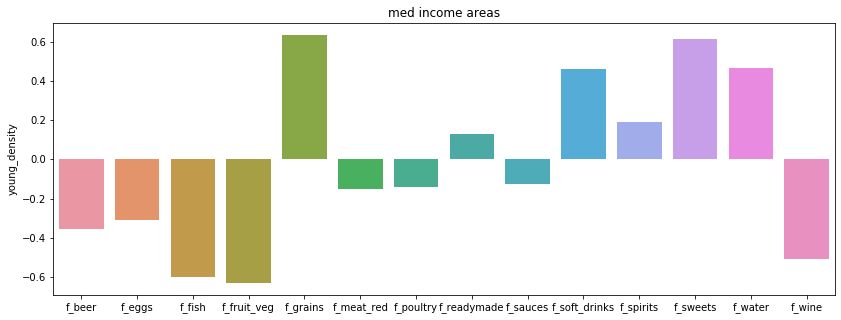

In [372]:
plt.figure(figsize = (14,5))
y_ax = rho_med_inc[abs(rho_med_inc['young_density']) > 0.1]['young_density'].drop(["Net annual income",
                                                                                   "young_density",
                                                                                   "middle_age_density"])

x_ax = rho_med_inc[abs(rho_med_inc['young_density']) > 0.1].drop(["Net annual income",
                                                                  "young_density",
                                                                  "middle_age_density"]).index

sns.barplot(x_ax, y_ax)
plt.title("med income areas")

In [349]:
rho_high_inc, p_val_high_inc = stats.spearmanr(high_inc_df, axis = 0)
rho_high_inc = pd.DataFrame(rho_high_inc, index = high_inc_df.columns, columns = high_inc_df.columns)
rho_high_inc.where(p_val_high_inc < 0.05,inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'High income areas')

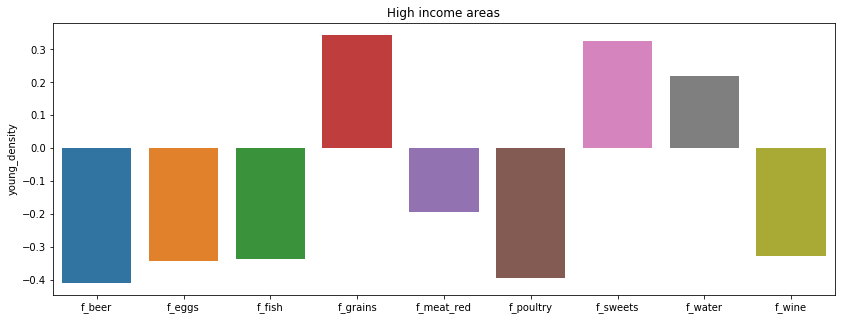

In [370]:
plt.figure(figsize = (14,5))
y_ax = rho_high_inc[abs(rho_high_inc['young_density']) > 0.1]['young_density'].drop(["old_density",
                                                                                     "young_density",
                                                                                     "middle_age_density"])

x_ax = rho_high_inc[abs(rho_high_inc['young_density']) > 0.1].drop(["old_density",
                                                                    "young_density",
                                                                    "middle_age_density"]).index
sns.barplot(x_ax, y_ax)
plt.title("High income areas")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Low income areas')

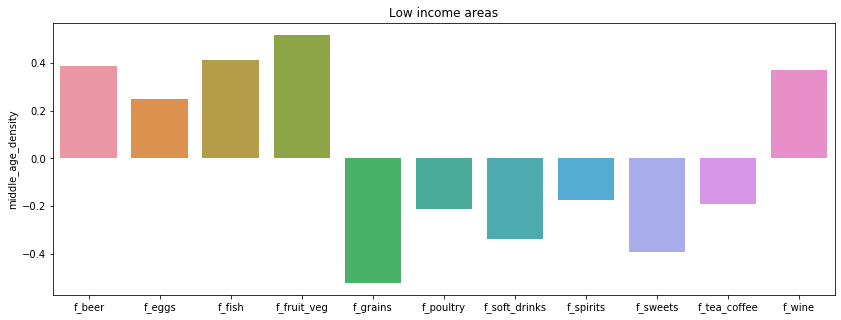

In [375]:
#PLOTS FOR THE MIDDLE AGE
plt.figure(figsize = (14,5))
y_ax = rho_low_inc[abs(rho_low_inc['middle_age_density']) > 0.1]['middle_age_density'].drop(["Net annual income",
                                                                                             "young_density",
                                                                                             "middle_age_density",
                                                                                             "old_density"])

x_ax = rho_low_inc[abs(rho_low_inc['middle_age_density']) > 0.1].drop(["Net annual income",
                                                                       "young_density",
                                                                       "middle_age_density",
                                                                       "old_density"]).index
sns.barplot(x_ax, y_ax)
plt.title("Low income areas")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'High income areas')

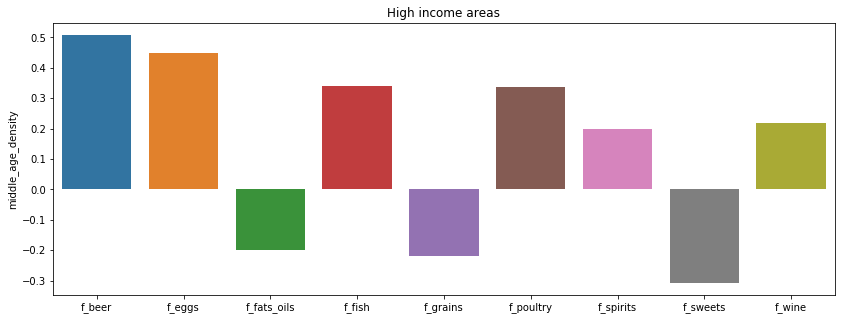

In [378]:
plt.figure(figsize = (14,5))
y_ax = rho_high_inc[abs(rho_high_inc['middle_age_density']) > 0.1]['middle_age_density'].drop(["middle_age_density", "young_density", "old_density"])

x_ax = rho_high_inc[abs(rho_high_inc['middle_age_density']) > 0.1].drop(["middle_age_density","young_density", "old_density"]).index
sns.barplot(x_ax, y_ax)
plt.title("High income areas")

## What is the typical product of these different income classes ? 

After having found this typical product, let's look at the food diversity and energy of nutrients etc...
